In [1]:
# Importing necessary libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Collection And Pre-processing

In [2]:
# Collectiong data from a csv file.
data=pd.read_csv('Flight_data.csv')

In [3]:
data.head()

,Unnamed: 0,Airline,Destination,Source,Arrival_time,Departure_time,Total_Stops,Total_Duration,Additional_Info,Price
0,0,SpiceJet,Goa,Chennai,22:00,03:15\n+ 1 day,1 Stop,5h 15m,Free Meal,"7,198"
1,1,SpiceJet,Goa,Chennai,22:00,17:05\n+ 1 day,1 Stop,19h 05m,Free Meal,"7,198"
2,2,IndiGo,Goa,Chennai,22:20,06:15\n+ 1 day,1 Stop,7h 55m,Free Meal,"7,476"
3,3,Air India,Goa,Chennai,15:25,22:20,1 Stop,6h 55m,Free Meal,"7,587"
4,4,Air India,Goa,Chennai,21:40,22:20\n+ 1 day,1 Stop,24h 40m,Free Meal,"7,587"


In [4]:
# Replacing the ',' character from price column.
data['Price']=data['Price'].str.replace(',','')

In [5]:
data.head(2)

,Unnamed: 0,Airline,Destination,Source,Arrival_time,Departure_time,Total_Stops,Total_Duration,Additional_Info,Price
0,0,SpiceJet,Goa,Chennai,22:00,03:15\n+ 1 day,1 Stop,5h 15m,Free Meal,7198
1,1,SpiceJet,Goa,Chennai,22:00,17:05\n+ 1 day,1 Stop,19h 05m,Free Meal,7198


In [6]:
data.tail()

,Unnamed: 0,Airline,Destination,Source,Arrival_time,Departure_time,Total_Stops,Total_Duration,Additional_Info,Price
1587,1587,Vistara,Goa,Bangalore,07:00,21:20,1 Stop,14h 20m,NaN,24799
1588,1588,Vistara,Goa,Bangalore,06:40,12:45,1 Stop,6h 05m,NaN,26059
1589,1589,Air India,Goa,Bangalore,21:20,00:40\n+ 2 days,1 Stop,27h 20m,NaN,27634
1590,1590,Air India,Goa,Bangalore,21:20,13:35\n+ 1 day,1 Stop,16h 15m,NaN,30364
1591,1591,Vistara,Goa,Bangalore,09:30,21:20,3 Stop(s),11h 50m,NaN,32956


In [7]:
# Checking Shape of dataset.
data.shape

(1592, 10)

The dataset contains 1592 rows and 10 columns.

In [8]:
# Data summary.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1592 non-null   int64 
 1   Airline          1592 non-null   object
 2   Destination      1592 non-null   object
 3   Source           1592 non-null   object
 4   Arrival_time     1592 non-null   object
 5   Departure_time   1592 non-null   object
 6   Total_Stops      1592 non-null   object
 7   Total_Duration   1592 non-null   object
 8   Additional_Info  1028 non-null   object
 9   Price            1592 non-null   object
dtypes: int64(1), object(9)
memory usage: 124.5+ KB


In [9]:
# Checking null values.
data.isnull().sum()

Unnamed: 0           0
Airline              0
Destination          0
Source               0
Arrival_time         0
Departure_time       0
Total_Stops          0
Total_Duration       0
Additional_Info    564
Price                0
dtype: int64

Here after checking the null values and data info, we can see only additional info column contain null values.

<AxesSubplot:>

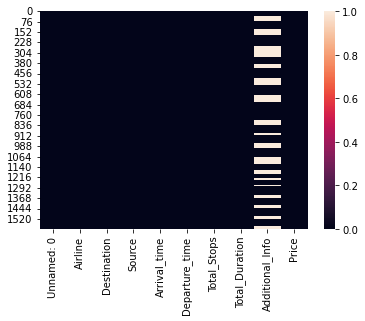

In [10]:
# Checking the null values using heatmap.
sns.heatmap(data.isnull())

We will handle missing values using mode imputation as it is categorical column.

In [11]:
data['Additional_Info'].fillna(data['Additional_Info'].mode()[0], inplace=True)

<AxesSubplot:>

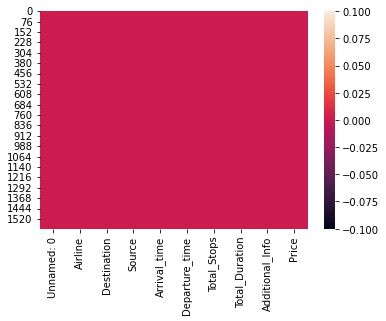

In [12]:
sns.heatmap(data.isnull())

We have successfully handle the missing value.

In [13]:
# Checking the unique values.
data.nunique()

Unnamed: 0         1592
Airline               7
Destination           8
Source                7
Arrival_time        221
Departure_time      331
Total_Stops           4
Total_Duration      339
Additional_Info       2
Price               658
dtype: int64

Almost all column contains unique values.

In [14]:
# We will remove the 'unnamed column' as it is irrelevent and only contain unique values.
data.drop('Unnamed: 0',axis=1,inplace=True)

In [15]:
# Checking the dataset columns.
data.columns

Index(['Airline', 'Destination', 'Source', 'Arrival_time', 'Departure_time',
       'Total_Stops', 'Total_Duration', 'Additional_Info', 'Price'],
      dtype='object')

# Exploratory Data Analysis

# Univariate data analysis

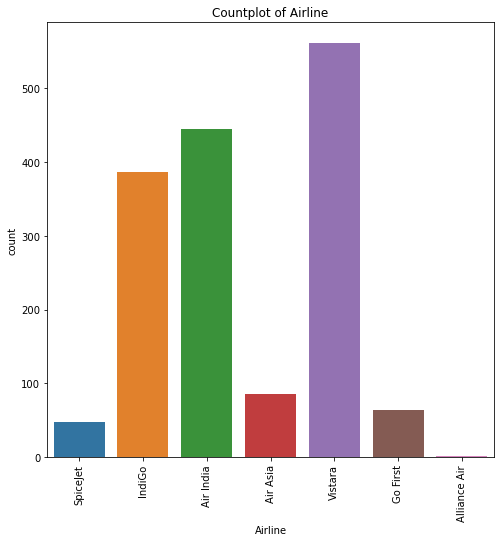

Vistara         561
Air India       445
IndiGo          386
Air Asia         86
Go First         64
SpiceJet         48
Alliance Air      2
Name: Airline, dtype: int64

In [16]:
# Visualizing the Airline column using countplot.

plt.subplots(figsize=(8,8))
sns.countplot(x='Airline', data=data)
plt.title("Countplot of Airline")
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel("count")
plt.show()

data['Airline'].value_counts()

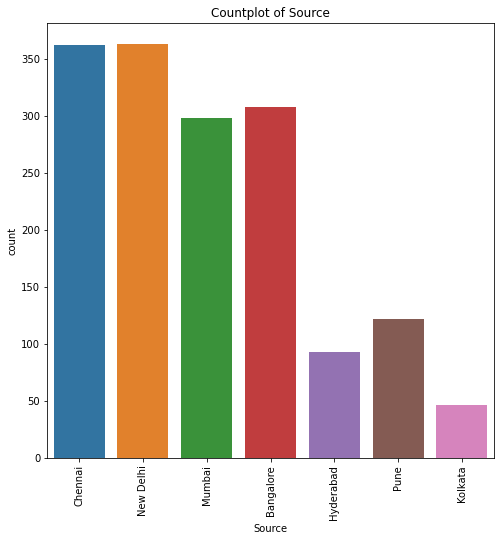

New Delhi    363
Chennai      362
Bangalore    308
Mumbai       298
Pune         122
Hyderabad     93
Kolkata       46
Name: Source, dtype: int64

In [17]:
# Visualizing Source column using countplot.

plt.subplots(figsize=(8,8))
sns.countplot(x='Source', data=data)
plt.title("Countplot of Source")
plt.xticks(rotation=90)
plt.xlabel('Source')
plt.ylabel("count")
plt.show()

data['Source'].value_counts()

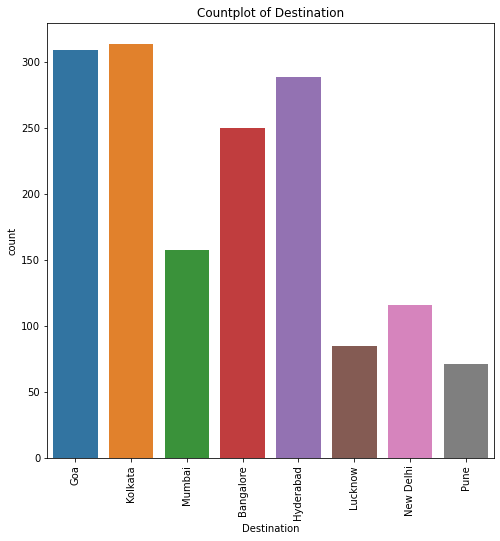

New Delhi    363
Chennai      362
Bangalore    308
Mumbai       298
Pune         122
Hyderabad     93
Kolkata       46
Name: Source, dtype: int64

In [18]:
# Visualizing Destination column using countplot.

plt.subplots(figsize=(8,8))
sns.countplot(x='Destination', data=data)
plt.title("Countplot of Destination")
plt.xticks(rotation=90)
plt.xlabel('Destination')
plt.ylabel("count")
plt.show()

data['Source'].value_counts()

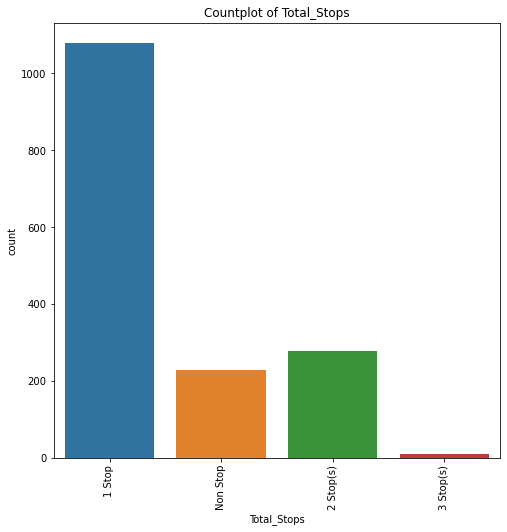

1 Stop       1078
2 Stop(s)     276
Non Stop      228
3 Stop(s)      10
Name: Total_Stops, dtype: int64

In [19]:
# Visualizing Total_Stops column using countplot.

plt.subplots(figsize=(8,8))
sns.countplot(x='Total_Stops', data=data)
plt.title("Countplot of Total_Stops")
plt.xticks(rotation=90)
plt.xlabel('Total_Stops')
plt.ylabel("count")
plt.show()

data['Total_Stops'].value_counts()

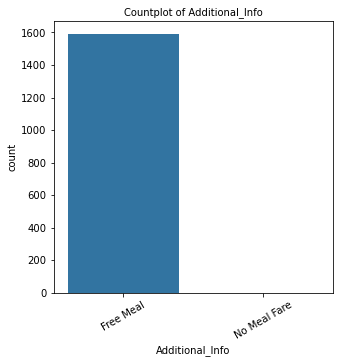

Free Meal       1590
No Meal Fare       2
Name: Additional_Info, dtype: int64


In [20]:
# Visualizing Addional_Info column using countplot.

plt.figure(figsize = (5,5))
ax=sns.countplot(x="Additional_Info", data=data) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Countplot of Additional_Info", fontsize = 10)
plt.show()
print(data['Additional_Info'].value_counts())

# Observations of Univariate Analysis

1.Most of the Airline that flies belongs to Vistara and very less are of Alliance air.

2.Most of the flights took off from New Delhi and Chennai and very less from Kolkata.

3.Most of the flights reached to Goa and kolkata and very less to Pune.

4.Most of the flights only take 1 stop and very less 3 stops.

# Feature Engineering

In [21]:
# Replacing String to numeric for better prediction.

data.replace({"Non Stop": 0, 
                      "1 Stop": 1, 
                      "2 Stop(s)": 2, 
                      "3 Stop(s)": 3, 
                     }, inplace = True)

In [22]:
data.tail()

,Airline,Destination,Source,Arrival_time,Departure_time,Total_Stops,Total_Duration,Additional_Info,Price
1587,Vistara,Goa,Bangalore,07:00,21:20,1,14h 20m,Free Meal,24799
1588,Vistara,Goa,Bangalore,06:40,12:45,1,6h 05m,Free Meal,26059
1589,Air India,Goa,Bangalore,21:20,00:40\n+ 2 days,1,27h 20m,Free Meal,27634
1590,Air India,Goa,Bangalore,21:20,13:35\n+ 1 day,1,16h 15m,Free Meal,30364
1591,Vistara,Goa,Bangalore,09:30,21:20,3,11h 50m,Free Meal,32956


In [23]:
# Converting Duration from string to numbers.
# Converting hours and mins into single figure for model prediction.

data['hour'] = data['Total_Duration'].str.split("h").str[0]
data['nothing'] = data['Total_Duration'].str.split(" ").str[1]
data['minute'] = data['nothing'].str.split("m").str[0]
data.drop('nothing',axis=1,inplace=True)

In [24]:
# We will change hours to zero and mins to 5.

for i in range(0,1591):
    if(data['hour'][i] == '5m'):
        data["hour"][i] = 0
        data["minute"][i] = 5

In [25]:
# Converting hours and mins into only minutes.
# Replacing null values with 0.

data['hour'] = pd.to_numeric(data['hour']) 
data['minute'] = pd.to_numeric(data['minute']) 
data['minute']=data['minute'].replace(np.NaN,0) 
data['minute'] = data['minute'].astype('int64') 
data['Duration'] =data['hour']*60 + data['minute'] 
data.drop('hour',axis=1,inplace=True)
data.drop('minute',axis=1,inplace=True) 
data.head() 


,Airline,Destination,Source,Arrival_time,Departure_time,Total_Stops,Total_Duration,Additional_Info,Price,Duration
0,SpiceJet,Goa,Chennai,22:00,03:15\n+ 1 day,1,5h 15m,Free Meal,7198,315
1,SpiceJet,Goa,Chennai,22:00,17:05\n+ 1 day,1,19h 05m,Free Meal,7198,1145
2,IndiGo,Goa,Chennai,22:20,06:15\n+ 1 day,1,7h 55m,Free Meal,7476,475
3,Air India,Goa,Chennai,15:25,22:20,1,6h 55m,Free Meal,7587,415
4,Air India,Goa,Chennai,21:40,22:20\n+ 1 day,1,24h 40m,Free Meal,7587,1480


In [26]:
# Converting hour and minute into a fix figure.
data['Arrival_time'] = pd.to_datetime(data['Arrival_time'],format = '%H:%M').dt.hour*60 + pd.to_datetime(data['Arrival_time'],format = '%H:%M').dt.minute


In [27]:
data.head()

,Airline,Destination,Source,Arrival_time,Departure_time,Total_Stops,Total_Duration,Additional_Info,Price,Duration
0,SpiceJet,Goa,Chennai,1320,03:15\n+ 1 day,1,5h 15m,Free Meal,7198,315
1,SpiceJet,Goa,Chennai,1320,17:05\n+ 1 day,1,19h 05m,Free Meal,7198,1145
2,IndiGo,Goa,Chennai,1340,06:15\n+ 1 day,1,7h 55m,Free Meal,7476,475
3,Air India,Goa,Chennai,925,22:20,1,6h 55m,Free Meal,7587,415
4,Air India,Goa,Chennai,1300,22:20\n+ 1 day,1,24h 40m,Free Meal,7587,1480


In [28]:
# Here we will drop Departure time and Total duration column as we extracted the desired figure from it.

data.drop('Departure_time',axis=1,inplace=True)
data.drop('Total_Duration',axis=1,inplace=True)

In [29]:
data.head()

,Airline,Destination,Source,Arrival_time,Total_Stops,Additional_Info,Price,Duration
0,SpiceJet,Goa,Chennai,1320,1,Free Meal,7198,315
1,SpiceJet,Goa,Chennai,1320,1,Free Meal,7198,1145
2,IndiGo,Goa,Chennai,1340,1,Free Meal,7476,475
3,Air India,Goa,Chennai,925,1,Free Meal,7587,415
4,Air India,Goa,Chennai,1300,1,Free Meal,7587,1480


# Label Encoding

In [30]:
# Separating the features that need encoding.

category=['Airline','Source','Destination','Additional_Info']

In [31]:
# Encoding the categorical columns into numerical columns using label encoding.

from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
data[category]= data[category].apply(la.fit_transform)

In [32]:
data.head()

,Airline,Destination,Source,Arrival_time,Total_Stops,Additional_Info,Price,Duration
0,5,1,1,1320,1,0,7198,315
1,5,1,1,1320,1,0,7198,1145
2,4,1,1,1340,1,0,7476,475
3,1,1,1,925,1,0,7587,415
4,1,1,1,1300,1,0,7587,1480


In [33]:
# Checking the statistical summary of data.
data.describe()

,Airline,Destination,Source,Arrival_time,Total_Stops,Additional_Info,Duration
count,1592.000000,1592.00000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000
mean,3.637563,2.60804,2.779523,854.221106,1.042714,0.001256,756.639447
std,2.176365,2.00994,2.110048,333.811093,0.583179,0.035433,503.712878
min,0.000000,0.00000,0.000000,5.000000,0.000000,0.000000,60.000000
25%,1.000000,1.00000,1.000000,565.000000,1.000000,0.000000,365.000000
50%,4.000000,2.00000,3.000000,922.500000,1.000000,0.000000,650.000000
75%,6.000000,4.00000,5.000000,1150.000000,1.000000,0.000000,1100.000000
max,6.000000,7.00000,6.000000,1435.000000,3.000000,1.000000,2470.000000


# Multivariate Data Analysis

<Figure size 1440x1440 with 0 Axes>

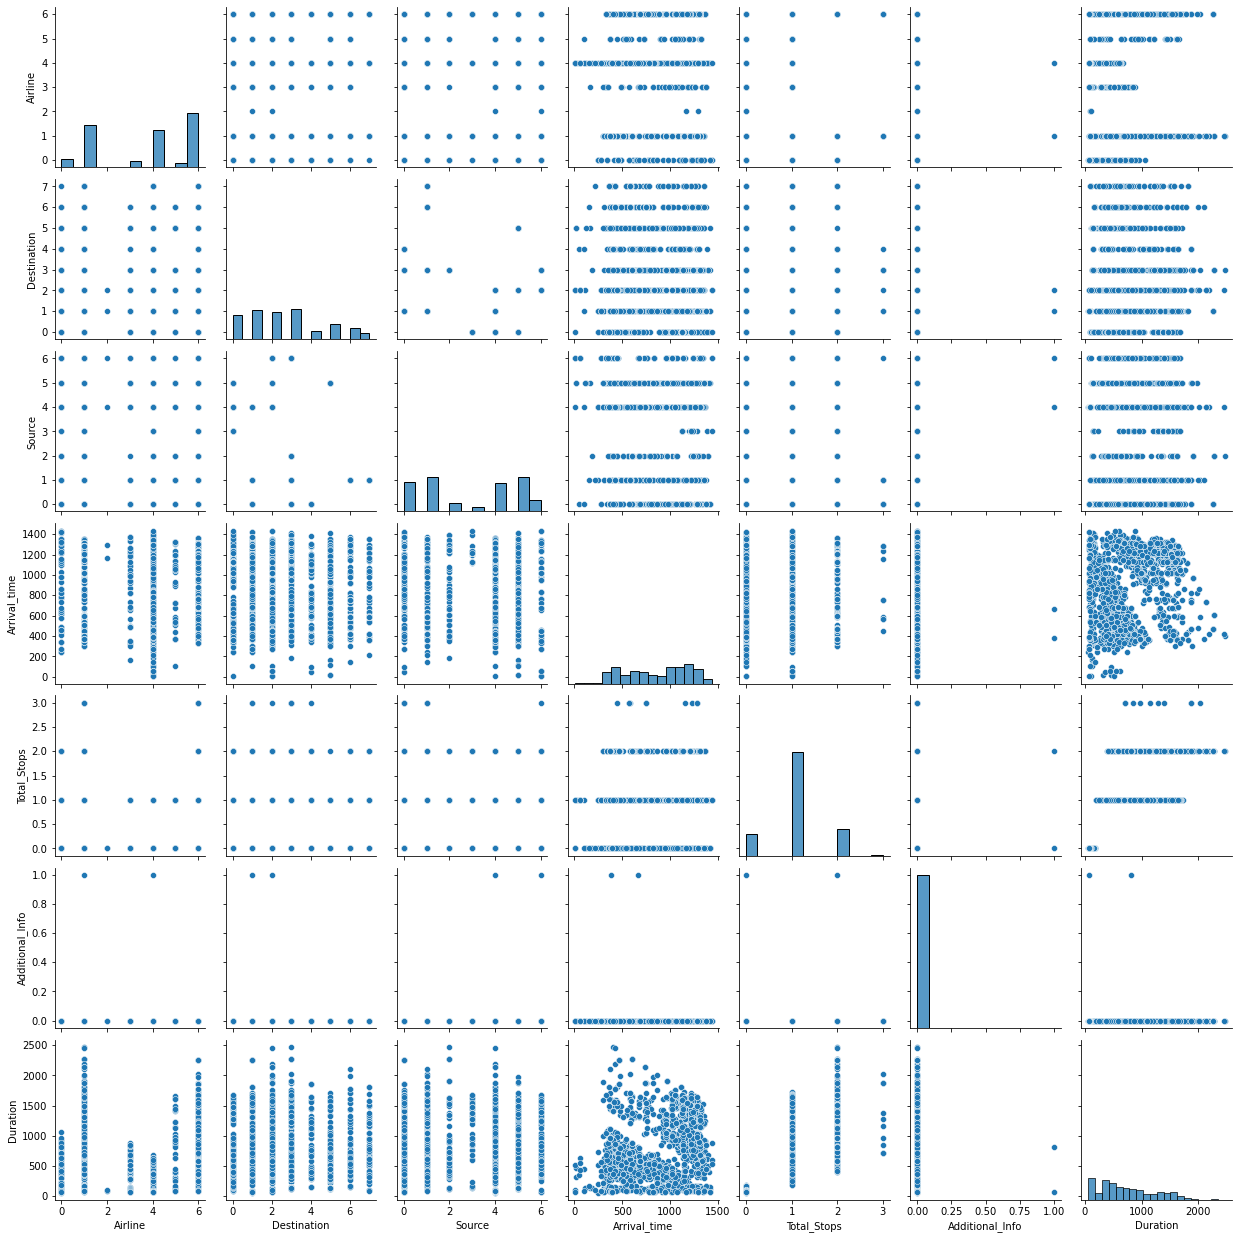

In [34]:
# Checking the pairwise relationship between columns.
plt.figure(figsize=(20,20))
sns.pairplot(data)
plt.show()

From pairplot,we can say that the features and traget column don't show any linear relationship with each other.

# Checking  the correlation

In [35]:
data.corr()

,Airline,Destination,Source,Arrival_time,Total_Stops,Additional_Info,Duration
Airline,1.000000,-0.040830,-0.024666,0.030593,0.066679,-0.018544,0.029958
Destination,-0.040830,1.000000,-0.212607,-0.097597,-0.003939,-0.019558,-0.042052
Source,-0.024666,-0.212607,1.000000,0.034705,-0.148641,0.037334,-0.108305
Arrival_time,0.030593,-0.097597,0.034705,1.000000,-0.037718,-0.034990,0.134081
Total_Stops,0.066679,-0.003939,-0.148641,-0.037718,1.000000,-0.002598,0.603863
Additional_Info,-0.018544,-0.019558,0.037334,-0.034990,-0.002598,1.000000,-0.022125
Duration,0.029958,-0.042052,-0.108305,0.134081,0.603863,-0.022125,1.000000


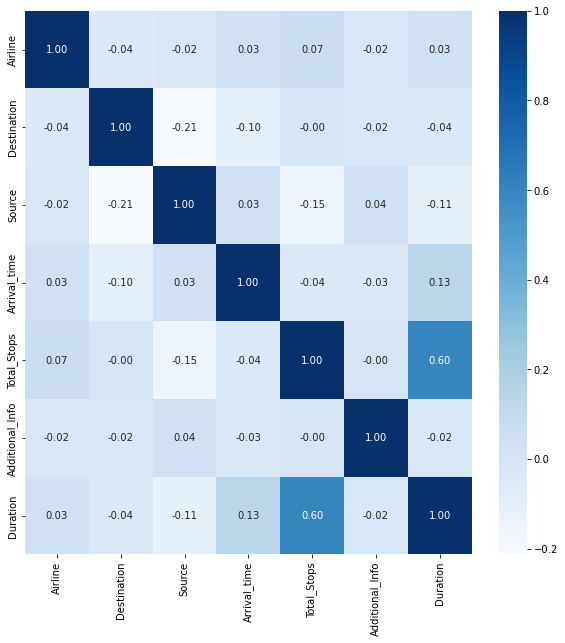

In [36]:
# Visualizing correlation using heatmap for better understanding.
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='Blues',fmt='0.2f')
plt.show()

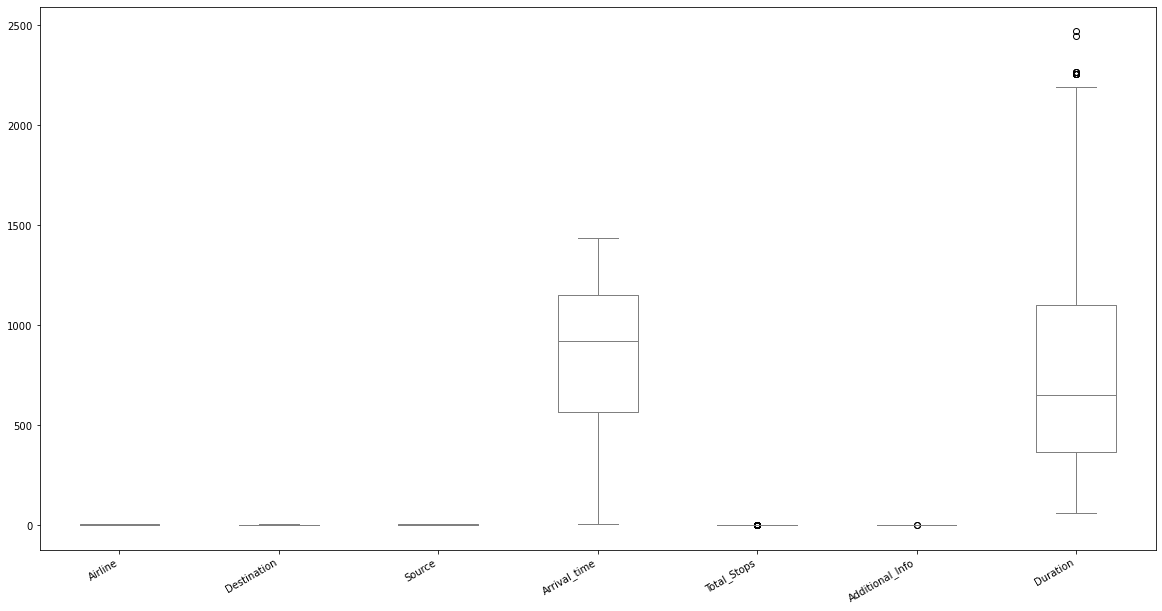

In [37]:
# Checking the outliers in dataset using boxplot.
data.plot(kind='box',fontsize=10,figsize=(20,10),color='grey')
plt.xticks(rotation=30,ha='right')
plt.show()

# Checking Skewness

In [38]:
data.skew()

Airline            -0.292631
Destination         0.555531
Source             -0.007142
Arrival_time       -0.214555
Total_Stops         0.185746
Additional_Info    28.186843
Price               0.913902
Duration            0.646494
dtype: float64

In [39]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [40]:
# Separating the columns that needs skewness removal.
removal=['Destination','Additional_Info','Price','Duration']

In [41]:
# Skewness handling using PowerTransformation(yeo-johnson) method.

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [42]:
data[removal] = scaler.fit_transform(data[removal].values)
data[removal].head()

,Destination,Additional_Info,Price,Duration
0,-0.730863,-0.035466,-1.172083,-0.829022
1,-0.730863,-0.035466,-1.172083,0.849437
2,-0.730863,-0.035466,-1.082268,-0.385485
3,-0.730863,-0.035466,-1.047169,-0.539425
4,-0.730863,-0.035466,-1.047169,1.299354


In [43]:
data.skew()

Airline            -0.292631
Destination        -0.066531
Source             -0.007142
Arrival_time       -0.214555
Total_Stops         0.185746
Additional_Info    28.186843
Price              -0.000171
Duration           -0.099904
dtype: float64

In [44]:
data.columns

Index(['Airline', 'Destination', 'Source', 'Arrival_time', 'Total_Stops',
       'Additional_Info', 'Price', 'Duration'],
      dtype='object')

In [45]:
# Separating the dataset into feature and target columns.
x=data.drop('Price',axis=1)
y=data['Price']

In [46]:
x.shape

(1592, 7)

In [47]:
y.shape

(1592,)

# Data Scaling

In [48]:
# Data scaling using MinMaxScaler.
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler() 
new = scaled.fit(x)  
scale_x = new.transform(x)

scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head()

,Airline,Destination,Source,Arrival_time,Total_Stops,Additional_Info,Duration
0,0.833333,0.260201,0.166667,0.919580,0.333333,0.0,0.274515
1,0.833333,0.260201,0.166667,0.919580,0.333333,0.0,0.657844
2,0.666667,0.260201,0.166667,0.933566,0.333333,0.0,0.375810
3,0.166667,0.260201,0.166667,0.643357,0.333333,0.0,0.340653
4,0.166667,0.260201,0.166667,0.905594,0.333333,0.0,0.760597


In [49]:
# Checking the multicolinearity after applying VIF to data.

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,3.360195,Airline
1,2.836860,Destination
2,2.381206,Source
3,5.552162,Arrival_time
4,7.802930,Total_Stops
5,1.004313,Additional_Info
6,9.859770,Duration


Data doesn't contains multicollinerity.

# Model Building and Evaluation

In [50]:
# Importing necessary libraries.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [51]:
# Finding the best random state.

max_r2=0
maxRS=0

for i in range(0,200):
    x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.20, random_state=i)
    rf=RandomForestRegressor()
    rf.fit(x_train,y_train)
    pred_rf=rf.predict(x_test)
    score = r2_score(y_test, pred_rf)
    if score>max_r2:
        max_r2=score
        maxRS=i
print("Best accuracy is ",max_r2," on Random_state ",maxRS) 

Best accuracy is  0.7800680216048734  on Random_state  188


In [52]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.20, random_state=188)

# RandomForestRegressor

In [53]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
print("R2 Score:                ", r2_score(y_test,pred_rf))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred_rf))
print("Mean Squared error:      ", mean_squared_error(y_test,pred_rf))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_rf)))

R2 Score:                 0.7814725346202426
Mean Absolute Error:      0.34248508450811616
Mean Squared error:       0.23703729286212943
Root Mean Squared Error:  0.4868647582872778


# LinearRegression

In [54]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("R2 Score:                ", r2_score(y_test,pred_lr))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred_lr))
print("Mean Squared error:      ", mean_squared_error(y_test,pred_lr))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 Score:                 0.5026833086036184
Mean Absolute Error:      0.57282945931636
Mean Squared error:       0.5394406694778285
Root Mean Squared Error:  0.7344662480181295


# DecisionTreeRegressor

In [55]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print("R2 Score:                ", r2_score(y_test,pred_dt))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred_dt))
print("Mean Squared error:      ", mean_squared_error(y_test,pred_dt))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_dt)))


R2 Score:                 0.6362092434762634
Mean Absolute Error:      0.39731883374871213
Mean Squared error:       0.3946047511455755
Root Mean Squared Error:  0.6281757326939457


# KNeighborsRegressor

In [56]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print("R2 Score:                ", r2_score(y_test,pred_knn))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred_knn))
print("Mean Squared error:      ", mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_knn)))


R2 Score:                 0.7362369250616814
Mean Absolute Error:      0.3920671216759111
Mean Squared error:       0.28610447264246497
Root Mean Squared Error:  0.5348873457490512


# GradientBoostingRegressor

In [57]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
print("R2 Score:                ", r2_score(y_test,pred_gbr))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred_gbr))
print("Mean Squared error:      ", mean_squared_error(y_test,pred_gbr))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_gbr)))


R2 Score:                 0.7245816621803143
Mean Absolute Error:      0.4091234142670835
Mean Squared error:       0.29874696568650694
Root Mean Squared Error:  0.5465775019944628


# Support Vector Regressor

In [58]:
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
print("R2 Score:                ", r2_score(y_test,pred_svr))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred_svr))
print("Mean Squared error:      ", mean_squared_error(y_test,pred_svr))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_svr)))


R2 Score:                 0.6599601615394973
Mean Absolute Error:      0.46187831038684174
Mean Squared error:       0.3688420704183926
Root Mean Squared Error:  0.6073236949258547


# Cross Validation for each model

In [59]:
# Cross validation score of RandomForestRegressor.

cvs=cross_val_score(rf,x,y,cv=10)
print('Cross_validation_score for RandomForestRegressor is:',cvs.mean())

Cross_validation_score for RandomForestRegressor is: 0.038156481330476735


In [60]:
cvs=cross_val_score(lr,x,y,cv=10)
print('Cross_validation_score for LogisticRegression is:',cvs.mean())

Cross_validation_score for LogisticRegression is: 0.21438469836494606


In [61]:
cvs=cross_val_score(dt,x,y,cv=10)
print('Cross_validation_score for DecisionTreeRegressor is:',cvs.mean())

Cross_validation_score for DecisionTreeRegressor is: -0.5075740952216823


In [62]:
cvs=cross_val_score(knn,x,y,cv=10)
print('Cross_validation_score for KNeighborsRegressor is:',cvs.mean())

Cross_validation_score for KNeighborsRegressor is: -0.025425497459508895


In [63]:
cvs=cross_val_score(gbr,x,y,cv=10)
print('Cross_validation_score for GradientBoostingRegressor is:',cvs.mean())

Cross_validation_score for GradientBoostingRegressor is: 0.17537945007455127


In [64]:
cvs=cross_val_score(svr,x,y,cv=10)
print('Cross_validation_score for SVR is:',cvs.mean())

Cross_validation_score for SVR is: 0.058814795605887406


We choose the model on basis of lowest difference between model accuracy score and cross validation score of that model,we observe that we got less difference/almost equal score for RandomForestRegressor,so we will perform hyper parameter tunning for RandomForestRegressor.

# Hyper Parameter Tunning

In [65]:
# We will do hyper parameter for RandomForest Regressor using GridSearchCV.

from sklearn.model_selection import GridSearchCV
param_grid = {'bootstrap': [True], 
              'max_depth': [5, 10, None], 
              'max_features': ['auto', 'log2'], 
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15],
              'min_samples_leaf':range(1,5)
             }

In [66]:
# Fitting the hyper parameters.
gsv = GridSearchCV(rf, param_grid)
gsv.fit(x_train,y_train) 
gsv.best_params_  

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 13}

In [67]:
# Getting the best parameters.
gsv_pred=gsv.best_estimator_.predict(x_test)

In [68]:
# R2 score after fitting the best parameters.
r2_score(y_test, gsv_pred)

0.7710950707449102

# Saving the model

In [71]:
import joblib
joblib.dump(gsv.best_estimator_,"Flight_Price_Prediction.obj")

['Flight_Price_Prediction.obj']